In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('data/16.txt', 'r') as f:
    data = [list(x) for x in f.read().splitlines()]
data = np.array(data)

In [4]:
ys, xs = np.where(data=='S')
start_pos = ys[0], xs[0]
ys, xs = np.where(data=='E')
end_pos = ys[0], xs[0]

In [5]:
distance_map = np.ones_like(data, dtype=float)
distance_map *= np.inf

In [6]:
directions = {
    (-1,0): ((0, -1),(0, 1)),
    (1, 0): ((0, -1),(0, 1)),
    (0,-1): ((-1,0), (1, 0)),
    (0, 1): ((-1,0), (1, 0)),
}

In [7]:
pos_ways = []
for d in directions:
    new_pos = start_pos[0] + d[0], start_pos[1] + d[1]
    if data[new_pos] == '.':
        if d == (0, 1):
            dist = 1
        elif d in ((1,0),(-1,0)):
            dist = 1001
        else:
            dist = 2001
        pos_ways.append([(new_pos), d, dist])

In [8]:
distance_map[start_pos] = 0

In [9]:
while pos_ways:
    pos, new_d, dist = pos_ways.pop()
    distance_map[pos] = min(distance_map[pos], dist)
    new_pos = pos[0] + new_d[0], pos[1] + new_d[1]
    if data[new_pos] != '#' and (distance_map[new_pos] > dist + 1):
        pos_ways.append(((pos[0]+ new_d[0], pos[1]+ new_d[1]), new_d, dist + 1))
    for d in directions[new_d]:
        new_pos = pos[0] + d[0], pos[1] + d[1]
        if data[new_pos] != '#' and (distance_map[new_pos] > dist + 1001):
            pos_ways.append((new_pos, d, dist + 1001))
        
    

In [10]:
moves = []
for d in directions:
    if distance_map[end_pos[0] + d[0], end_pos[1] + d[1]] < distance_map[end_pos]:
        moves.append((end_pos[0] + d[0], end_pos[1] + d[1]))

In [10]:
temp_map = np.zeros_like(distance_map)
visited = set([end_pos])
while moves:
    new_pos = moves.pop()
    visited.add(new_pos)
    temp_map[new_pos] = 1
    for d in directions:
        if (
            (distance_map[new_pos[0] + d[0], new_pos[1] + d[1]] < distance_map[new_pos]) or 
            (
                (
                    distance_map[new_pos[0] + d[0], new_pos[1] + d[1]] - 
                    distance_map[new_pos[0] - d[0], new_pos[1] - d[1]] == -2
                ) and
                (
                    (new_pos[0] + d[0], new_pos[1] + d[1]) not in visited
                ) and
                    (new_pos[0] - d[0], new_pos[1] - d[1]) in visited
            )
           ):
            moves.append((new_pos[0] + d[0], new_pos[1] + d[1]))

/var/folders/0p/8h87y7r9307143fb5t7nn_j40000gn/T/ipykernel_64535/1553828993.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  distance_map[new_pos[0] + d[0], new_pos[1] + d[1]] -


In [11]:
print('Part 1:', int(distance_map[end_pos]))
print('Part 2:', len(visited))

Part 1: 147628
Part 2: 670


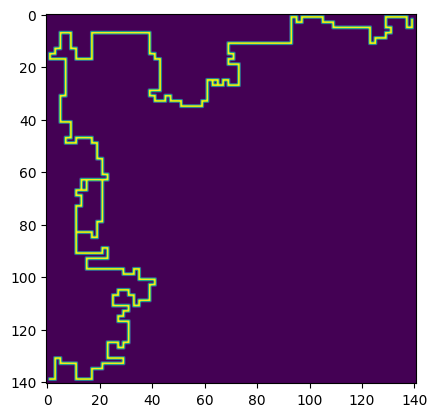

In [12]:
plt.imshow(temp_map)

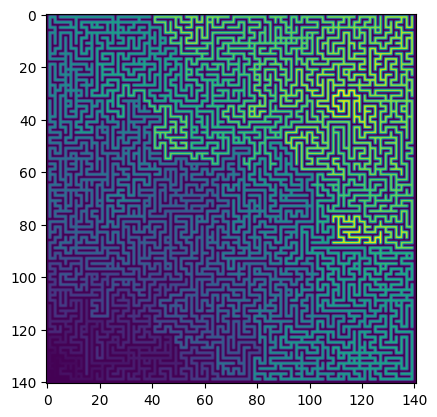

In [13]:
distance_map += 1
distance_map[distance_map == np.inf] = 0
plt.imshow(distance_map)